In this notebook some of the code in src.analysis_utils is executed. The code over there is nicely written up in a python class. This includes analysis on Friends and Followers, after work drinks, a German saying and drinking behaviour of brewers.

In [1]:
import commands
import csv
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import commands as cmd

root_path = cmd.getoutput('pwd')[:cmd.getoutput('pwd').find('/databeers/')] + '/databeers'

import sys
sys.path.append(root_path)

In [3]:
from src.read_write_utils import *
from src.analysis_utils import *
from src.utils import *

In [4]:
begin_time = datetime(2016, 7, 26)
end_time = datetime(2016, 8, 2)
ta = TweetsAnalysis(begin_time, end_time, root_path)

## Friends & Follower - social analysis

In [5]:
df = load_joined_df(begin_time, end_time, root_path=root_path)[['text', 'id_str_y',
       u'default_profile', u'description', u'favourites_count',
       u'followers_count', u'friends_count', u'statuses_count']]

In [6]:
cast_cols = ["favourites_count", "followers_count", "friends_count"]
df[cast_cols] = df[cast_cols].apply(pd.to_numeric)

In [7]:
df = df.groupby(["id_str_y"], as_index=False).agg({"description": "count",
                                              "favourites_count": "max",
                                             "followers_count": "max",
                                             "friends_count": "max"}).rename(columns={"description": "n_tweets"})

In [8]:
max(df["n_tweets"])

1990

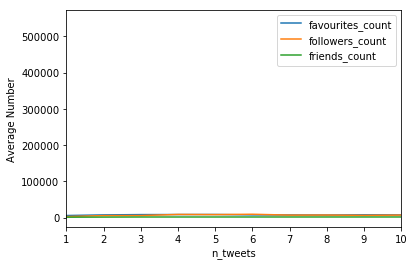

In [10]:
df_soc = ta.socializing_analysis()

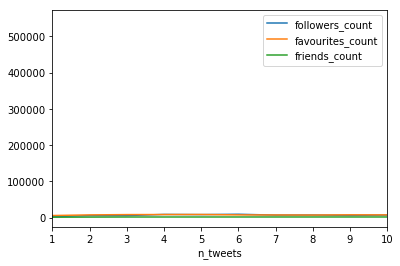

In [11]:
df.groupby(["n_tweets"]).agg({"favourites_count": "mean",
                          "followers_count": "mean",
                          "friends_count": "mean"}).plot(xlim=(1, 10))

In [13]:
# are there errors in the data?
print 'non integer', len(df[~df["friends_count"].map(lambda x: str(x)).str.match("[0-9]+")])
df[~df["friends_count"].map(lambda x: str(x)).str.match("[0-9]+")]

non integer 1


,id_str_y,followers_count,favourites_count,n_tweets,friends_count
306128,2884172893,51,0,1,-4


### No beer before 4 pm in Germany?

1144330


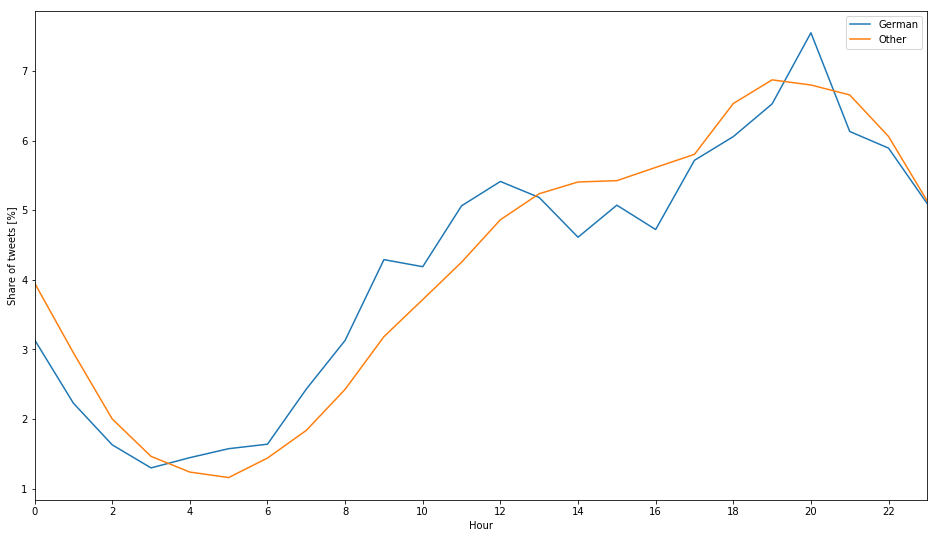

In [14]:
df = ta.kein_bier_vor_vier()

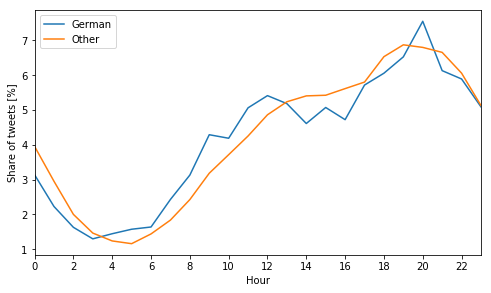

In [15]:
ax = df.plot(figsize=(8, 4.5))
ax.set_xlabel("Hour")
ax.set_ylabel("Share of tweets [%]")
ax.set_xticks(range(0, 24, 2))

In [16]:
df.sum()

German    100.0
Other     100.0
dtype: float64

## After Work Drinks
When do people start drinking? Are there countries where after-work-drinks are more popular than in others?

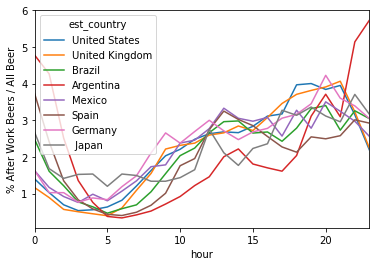

In [17]:
df2 = ta.awd_analysis()

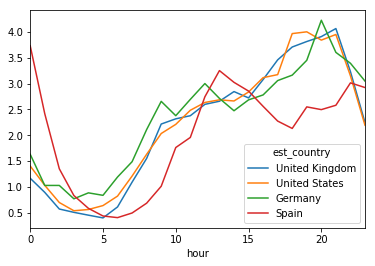

In [18]:
df2[["United Kingdom", "United States", "Germany", "Spain"]].plot()

## Do brewers drink more?
Give a man a beer and waste an hour, teach a man to brew and waste a lifetime?!

brewer
False    1.608942
True     4.384894
Name: id_str_x, dtype: float64

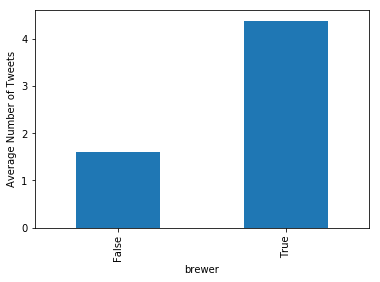

In [19]:
ta.brewer_analysis()

In [14]:
# brewer_pattern = u"(?i)brewing|brewer|cervejaria|cervecería|brasserie|brauerei"
# descr_df['brewer'] = descr_df['description'].str.contains(brewer_pattern)